### Mutant screen confidence interval plots
<p> The following code will generate plots of the mean difference confidence intervals for tax-4/N2, osm-9/N2 and tax-4:osm-9 double/N2. These plots represent the mean difference in response compared to the mean of the null response to DMSO:DMSO and DMSO:H2O</p>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import pandas as pd
import numpy as np

#### Reading in and cleaning up the datasets
<p> When we are generating this plot we want to order the mutant data according to the N2 response. This helps us to visualize the change in response, if any.</p>

In [2]:
#Generating a function that subsets the data for a single 'control' condition
def subset_ref_comp(df, strain):
    dat = df.loc[(df['Strain'] == strain)&(df['control'] == 'DMSO')]
    dat =dat.sort_values('difference')
    #Two compounds accidently made it into the mutant screen that should have been excluded due to a sorting error
    dat = dat.loc[(dat['test'] != '2-Nonylquinolin-4(1H)-one') & (dat['test'] != 'Rosmarinic acid')& (dat['test'] != 'Safranal')]
    dat = dat.reset_index(drop=True)
    return dat


In [3]:
#Reading all relevant datasets

N2dat = pd.read_csv('C:/Users/Emily/Documents/S1/inner3.csv', index_col=0)
N2dat['Strain'] = 'N2'
all_strains = pd.read_csv('C:/Users/Emily/Documents/S1f2/all_strains_nullrefs_mdiff.csv', index_col=0)

In [4]:
all_strains.head()

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney,Strain
0,DMSO,(-)-Huperzine A,851,675,mean difference,False,2.506552,95,1.196282,3.777346,...,12345,0.0002,5000,1.410690e-04,-3.816288,1.548620e-04,-3.792664,3.505100e-04,256649.0,PR678
1,DMSO,1-octanol,851,668,mean difference,False,-3.953032,95,-5.293354,-2.707069,...,12345,0.0000,5000,1.940000e-09,6.040730,2.570000e-09,5.992922,4.770000e-09,333919.0,PR678
2,DMSO,"2,3-Dihydrobenzofuran",851,670,mean difference,False,6.791056,95,5.381876,8.232949,...,12345,0.0000,5000,1.420000e-19,-9.193824,2.960000e-20,-9.352530,5.060000e-19,209306.0,PR678
3,DMSO,"2,5-Dihydroxybenzoic acid",851,998,mean difference,False,1.256955,95,0.014839,2.370033,...,12345,0.0378,5000,3.894494e-02,-2.066285,3.872075e-02,-2.068619,7.237558e-02,404089.0,PR678
4,DMSO,2-Methyl-1-butanol,851,640,mean difference,False,1.722631,95,0.324622,3.058874,...,12345,0.0140,5000,1.332786e-02,-2.478130,1.303927e-02,-2.485684,2.376176e-02,253714.0,PR678


#### We are using the sorted N2 mean differences (calculated for the 95% confidence intervals) for all testing conditions relative to DMSO. This list will be passed to the function call below.

In [5]:
N2DMSO = subset_ref_comp(N2dat, 'N2')
comp_ord= N2DMSO['test']

#### Generating vertical line plots to visualize the difference in response between N2 and mutant strains for both DMSO and water conditions

In [12]:
strains = ['GN1077', 'CX10', 'PR678']

fig, ax = plt.subplots(figsize=(10,10), ncols=len(strains), sharey=True) 

########################## I STOPPED HERE!!!!!!!!!!!
control = 'DMSO'


for i in strains:

    mutant_dat = all_strains.loc[all_strains['Strain']==i]

    c = strains.index(i)
    

    positions = list(range(0, len(comp_ord)))
    ref_dat1 = N2DMSO.loc[N2DMSO['control']==control]
    ref_dat1 = ref_dat1.set_index('test')

    reordered1 = ref_dat1.reindex(comp_ord)
    reordered1 = reordered1.reset_index()
    reordered1['bca_low'] = reordered1['bca_low'].astype(np.float64)
    reordered1['bca_high'] = reordered1['bca_high'].astype(np.float64)


    lines1 = []
    for index, row in reordered1.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines1.append(line)

    ref_dat2 = mutant_dat.loc[mutant_dat['control']==control]
    ref_dat2 = ref_dat2.set_index('test')

    reordered2 = ref_dat2.reindex(comp_ord)
    reordered2 = reordered2.reset_index()

    lines2 = []
    for index, row in reordered2.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines2.append(line)

    ax[c].fill_betweenx(positions, reordered1['bca_low'], reordered1['bca_high'], alpha=.25, color='#b2df8a')
    ytick_labels = list(reordered1['test'])

    mdiffs1 = list(reordered1['difference'])
    mdiffs2 = list(reordered2['difference'])

    #fig, ax = plt.subplots(figsize=(5,10)) 

    hln_coll1 = mpl.collections.LineCollection(lines1, colors='black', linewidths = 1)
    hln_coll2 = mpl.collections.LineCollection(lines2, colors='#1f78b4', linewidths = 1)
    #ax[r,c] = plt.gca()


    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)


    #ax[r,c].xaxis.set_ticks_position('both')
    ax[c].add_collection(hln_coll1)
    ax[c].add_collection(hln_coll2)
    ax[c].scatter(mdiffs1, positions, s=5, c='black')
    ax[c].scatter(mdiffs2, positions, s=5, c='#1f78b4')
    ax[c].tick_params(axis='both', tickdir='in')
    ax[c].spines['top'].set_visible(False)
    ax[c].spines['right'].set_visible(False)

    ax[c].set_xlim(-15, 15)    
    ax[c].set_ylim(-1, len(comp_ord))
    ax[c].set_title(i)
    ax[c].axvline(0, ls='--', c='gray')
    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/allmuts_mdiffPlot_DMSOnly.svg')


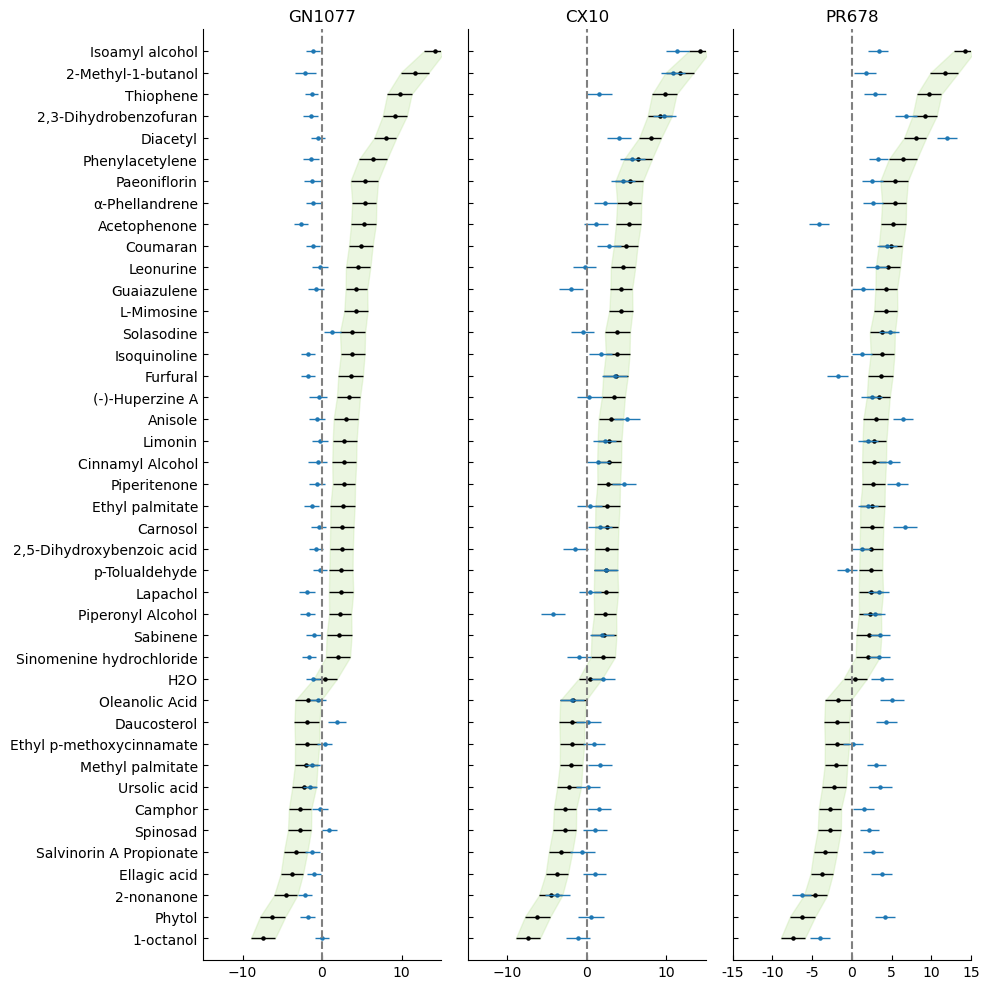

In [11]:
plt.show()

In [7]:
strains = ['GN1077', 'CX10', 'PR678']


control = 'DMSO'


for i in strains:
    fig, ax = plt.subplots(figsize=(5,10)) 
    mutant_dat = all_strains.loc[all_strains['Strain']==i]

    positions = list(range(0, len(comp_ord)))
    ref_dat1 = N2DMSO.loc[N2DMSO['control']==control]
    ref_dat1 = ref_dat1.set_index('test')

    reordered1 = ref_dat1.reindex(comp_ord)
    reordered1 = reordered1.reset_index()
    reordered1['bca_low'] = reordered1['bca_low'].astype(np.float64)
    reordered1['bca_high'] = reordered1['bca_high'].astype(np.float64)


    lines1 = []
    for index, row in reordered1.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines1.append(line)

    ref_dat2 = mutant_dat.loc[mutant_dat['control']==control]
    ref_dat2 = ref_dat2.set_index('test')

    reordered2 = ref_dat2.reindex(comp_ord)
    reordered2 = reordered2.reset_index()

    lines2 = []
    for index, row in reordered2.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines2.append(line)

    ax.fill_betweenx(positions, reordered1['bca_low'], reordered1['bca_high'], alpha=.25, color='#858585')
    ytick_labels = list(reordered1['test'])

    mdiffs1 = list(reordered1['difference'])
    mdiffs2 = list(reordered2['difference'])

    #fig, ax = plt.subplots(figsize=(5,10)) 

    hln_coll1 = mpl.collections.LineCollection(lines1, colors='black', linewidths = 1)
    hln_coll2 = mpl.collections.LineCollection(lines2, colors='red', linewidths = 1)
    #ax[r,c] = plt.gca()


    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)


    #ax[r,c].xaxis.set_ticks_position('both')
    ax.add_collection(hln_coll1)
    ax.add_collection(hln_coll2)
    ax.scatter(mdiffs1, positions, s=5, c='black')
    ax.scatter(mdiffs2, positions, s=5, c='black')
    ax.tick_params(axis='both', tickdir='in')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlim(-15, 15)    
    ax.set_ylim(-1, len(comp_ord))
    ax.set_title(i)
    ax.axvline(0, ls='--', c='gray')
    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/'+ i + 'mdiffPlot_DMSOnly.svg')


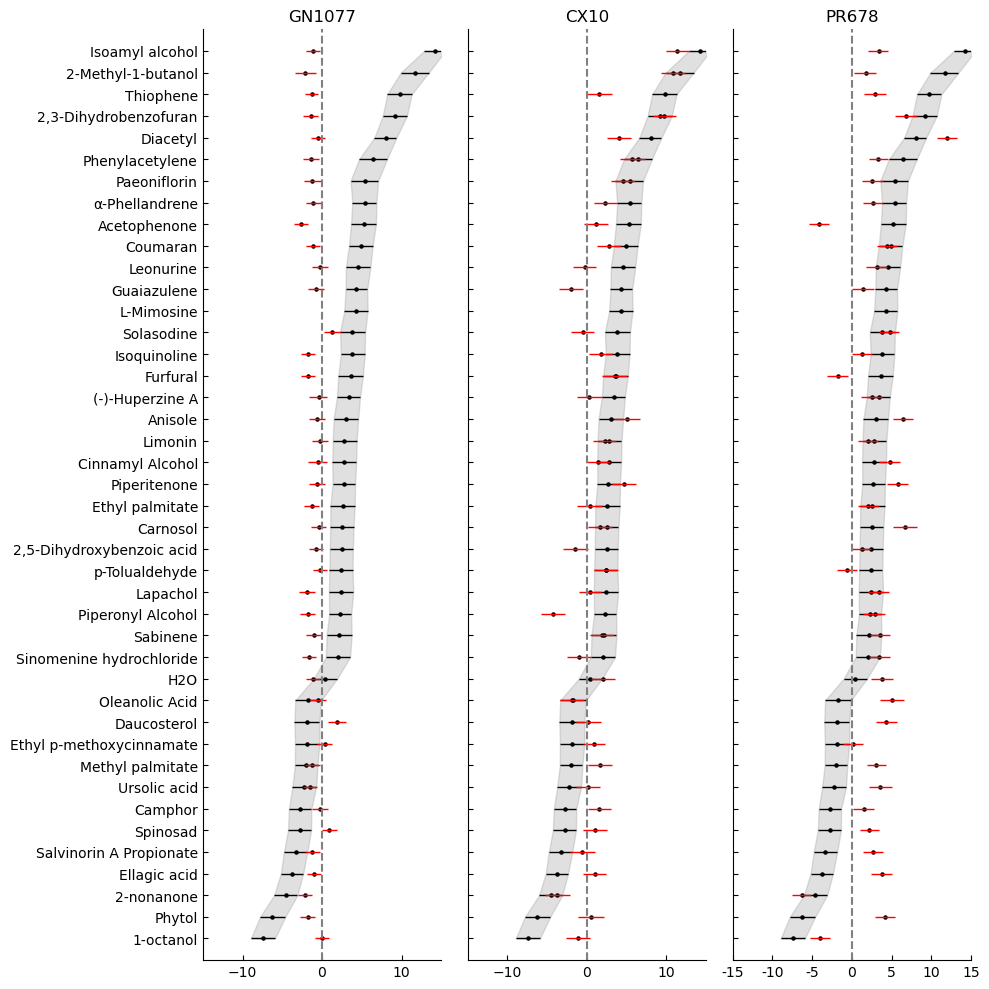

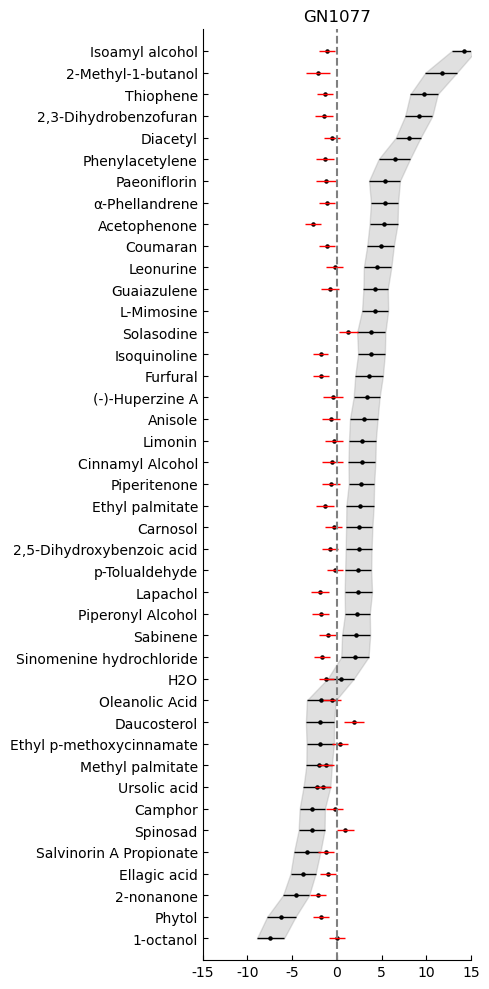

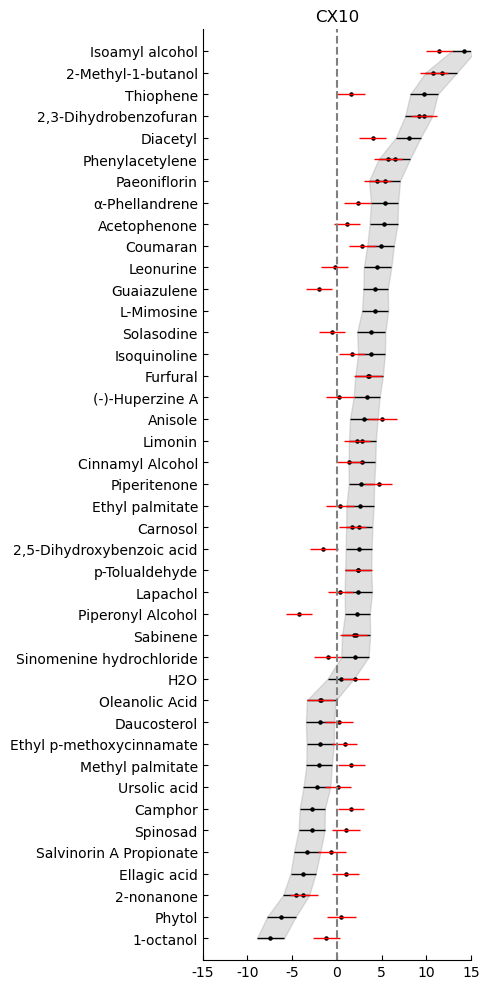

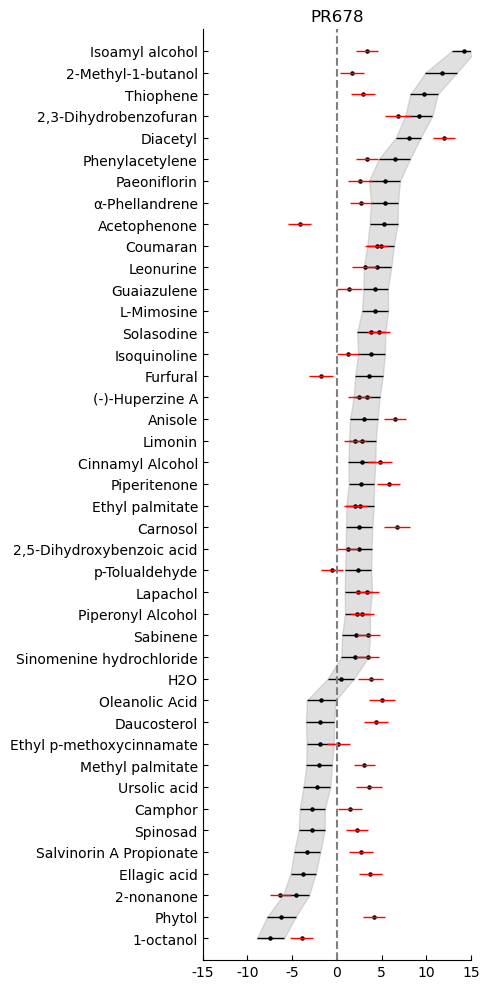

In [8]:
plt.show()